In [52]:
from __future__ import print_function

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import time

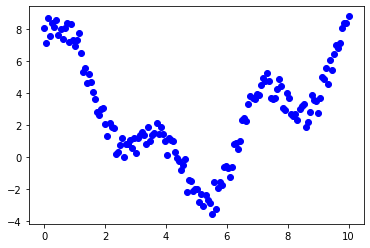

In [2]:
n = 150
X_data = np.linspace(0,10,n)
X_data = X_data.reshape((n,1))
Y_data = np.sin(X_data) + 2* np.sin(2 * X_data) + 0.3 * (X_data - 5)**2 
data_no_noise = np.concatenate((X_data, Y_data), axis=1)

Y_data += np.random.normal(0, 0.5, [n,1])

plt.plot(X_data, Y_data, 'bo')
plt.show()

In [3]:
data = np.concatenate((X_data, Y_data), axis=1)
data_eval = data.copy()

np.random.shuffle(data)

data_tr, data_val, data_test = np.split(data, [int(0.8*n), int(0.8*n)+int(0.1*n)], axis = 0)
print(data_tr.shape, data_val.shape, data_test.shape)

(120, 2) (15, 2) (15, 2)


In [18]:
def next_batch(data_tr, i, batch_size):
    return data_tr[i*batch_size:(i+1)*batch_size-1, :]  


In [69]:
# Parameters
learning_rate = 0.01
num_epochs = 1000
batch_size = 20
display_step = 100

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_input = 1 # MNIST data input (img shape: 28*28)
num_output = 1 # MNIST total classes (0-9 digits)

# tf Graph input
X = tf.placeholder(tf.float32, shape = [None, 1])
Y = tf.placeholder(tf.float32, shape = [None, 1])

In [70]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, num_output]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_output]))
}

In [71]:
# Create model
def neural_net(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['h1']), biases['b1']))
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']))
    # Output fully connected layer 
    out_layer = tf.add(tf.matmul(layer_2, weights['out']), biases['out'])
    return out_layer

In [72]:
# Construct model
fp = neural_net(X)

# Define loss and optimizer
cost = tf.reduce_sum(tf.pow(fp-Y, 2))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [73]:
sess = tf.Session()
sess.run(init)


1


In [74]:
training_error = [sess.run(cost, feed_dict={X: data_tr[:, [0]], Y: data_tr[:, [1]]}) / data_tr.shape[0]]
validation_error = [sess.run(cost, feed_dict={X: data_val[:, [0]], Y: data_val[:, [1]]}) / data_val.shape[0]]
i = 0

itpep = data_tr.shape[0] // batch_size
tic = time.perf_counter()

for iteration in range(num_epochs * itpep):

    data_batch = next_batch(data_tr, i, batch_size)
    sess.run(train_op, feed_dict={X: data_batch[:, [0]], Y: data_batch[:, [1]]})
    
    if (iteration + 1) % itpep == 0:
        i = 0
        training_error.append(sess.run(cost, feed_dict={X: data_tr[:, [0]], Y: data_tr[:, [1]]}) / data_tr.shape[0])
        validation_error.append(sess.run(cost, feed_dict={X: data_val[:, [0]], Y: data_val[:, [1]]}) / data_val.shape[0])
    else:
        i += 1
    
    if (iteration + 1) % (display_step * itpep) == 0 or iteration == 0:
        loss = sess.run(cost, feed_dict={X: data_tr[:, [0]], Y: data_tr[:, [1]]})
        print("Epoch:", '%04d' % ((iteration + 1) // itpep), "loss=", "{:.9f}".format(loss))

toc = time.perf_counter()

print("Optimization Finished!")

Epoch: 0000 loss= 2883.554199219
Epoch: 0100 loss= 73.700851440
Epoch: 0200 loss= 34.720088959
Epoch: 0300 loss= 29.538282394
Epoch: 0400 loss= 28.388399124
Epoch: 0500 loss= 28.614011765
Epoch: 0600 loss= 28.399112701
Epoch: 0700 loss= 39.397567749
Epoch: 0800 loss= 25.713165283
Epoch: 0900 loss= 25.975006104
Epoch: 1000 loss= 25.474170685
Optimization Finished!


In [75]:
print(f"Run in {toc - tic:0.4f} seconds")

Run in 15.3176 seconds


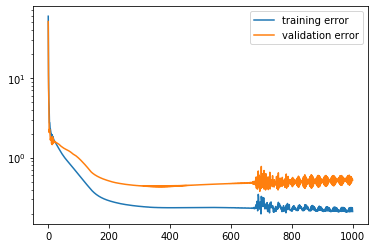

In [76]:
plt.yscale('log')
plt.plot(np.arange(len(training_error)), training_error, label = 'training error')
plt.plot(np.arange(len(training_error)), validation_error, label = 'validation error')
plt.legend()
plt.show()

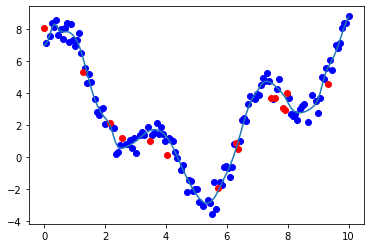

In [41]:
plt.plot(data_tr[:, [0]], data_tr[:, [1]], 'bo')
plt.plot(data_test[:, [0]], data_test[:, [1]], 'ro')
plt.plot(data_eval[:, [0]], sess.run(fp, feed_dict = {X: data_eval[:, [0]]}))
plt.show()

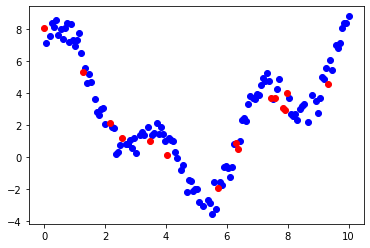

In [15]:
plt.plot(data_tr[:, [0]], data_tr[:, [1]], 'bo')
plt.plot(data_test[:, [0]], data_test[:, [1]], 'ro')
plt.show()

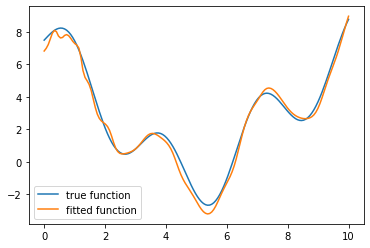

In [77]:
plt.plot(data_no_noise[:, [0]], data_no_noise[:, [1]], label = 'true function')
plt.plot(data_eval[:, [0]], sess.run(fp, feed_dict = {X: data_eval[:, [0]]}), label = 'fitted function')
plt.legend()
plt.show()